# Michaelis-Menten
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [2]:
import gillespy2

***
## Build the Michaelis Menten Model
***
Model must include rates, species, and reactions

In [3]:
def build_michaelis_menten(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Michaelis_Menten")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='Substrate', initial_value=301)
    B = gillespy2.Species(name='Enzyme', initial_value=120)
    C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
    D = gillespy2.Species(name='Product', initial_value=0)
    
    # Add Variables to Model
    model.add_species([A, B, C, D])

    # Define Parameters
    rate1 = gillespy2.Parameter(name='rate1', expression=0.0017)
    rate2 = gillespy2.Parameter(name='rate2', expression=0.5)
    rate3 = gillespy2.Parameter(name='rate3', expression=0.1)
    
    # Add Parameters to Model
    model.add_parameter([rate1, rate2, rate3])

    # Define Reactions
    r1 = gillespy2.Reaction(
        name="r1", reactants={'Substrate': 1, 'Enzyme': 1}, products={'Enzyme_Substrate_Complex': 1}, rate='rate1'
    )
    r2 = gillespy2.Reaction(
        name="r2", reactants={'Enzyme_Substrate_Complex': 1}, products={'Substrate': 1, 'Enzyme': 1}, rate='rate2'
    )
    r3 = gillespy2.Reaction(
        name="r3", reactants={'Enzyme_Substrate_Complex': 1}, products={'Enzyme': 1, 'Product': 1}, rate='rate3'
    )
    
    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = build_michaelis_menten()

***
## Run the Simulations
***
Run the model by calling the run function on the model and select algorithm via 'algorithm' keyword argument.
### ODE Simulation

In [5]:
ode_results = model.run(algorithm="ODE")

### SSA Simulation

In [6]:
ssa_results = model.run(algorithm="SSA")

###  Tau Leaping Simulation

In [7]:
tau_results = model.run(algorithm="Tau-Leaping")

###  Tau Hybrid Simulation

In [8]:
hybrid_results = model.run(algorithm="Tau-Hybrid")

***
## Visualizations
***

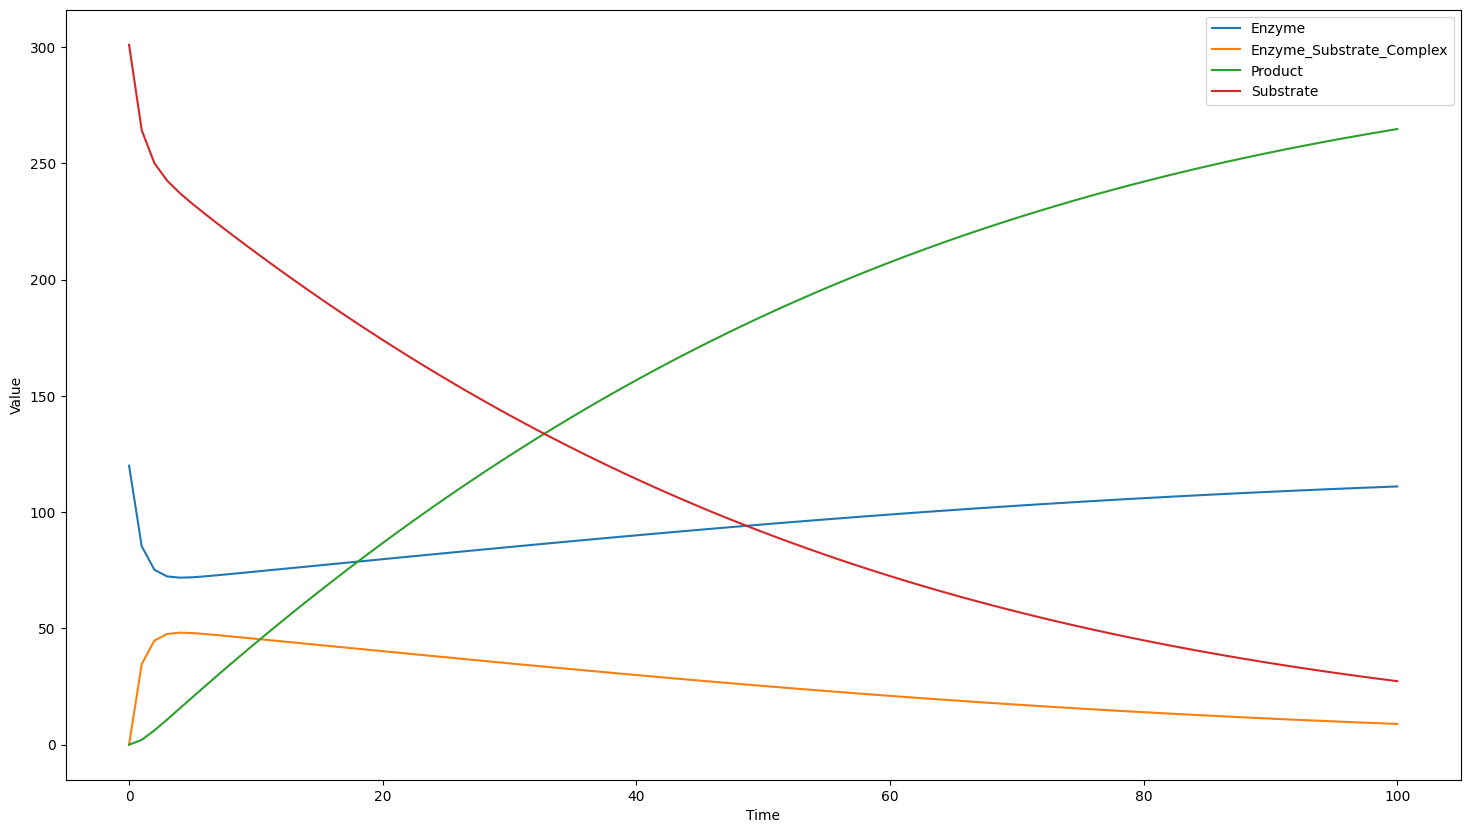

In [9]:
ode_results.plot()

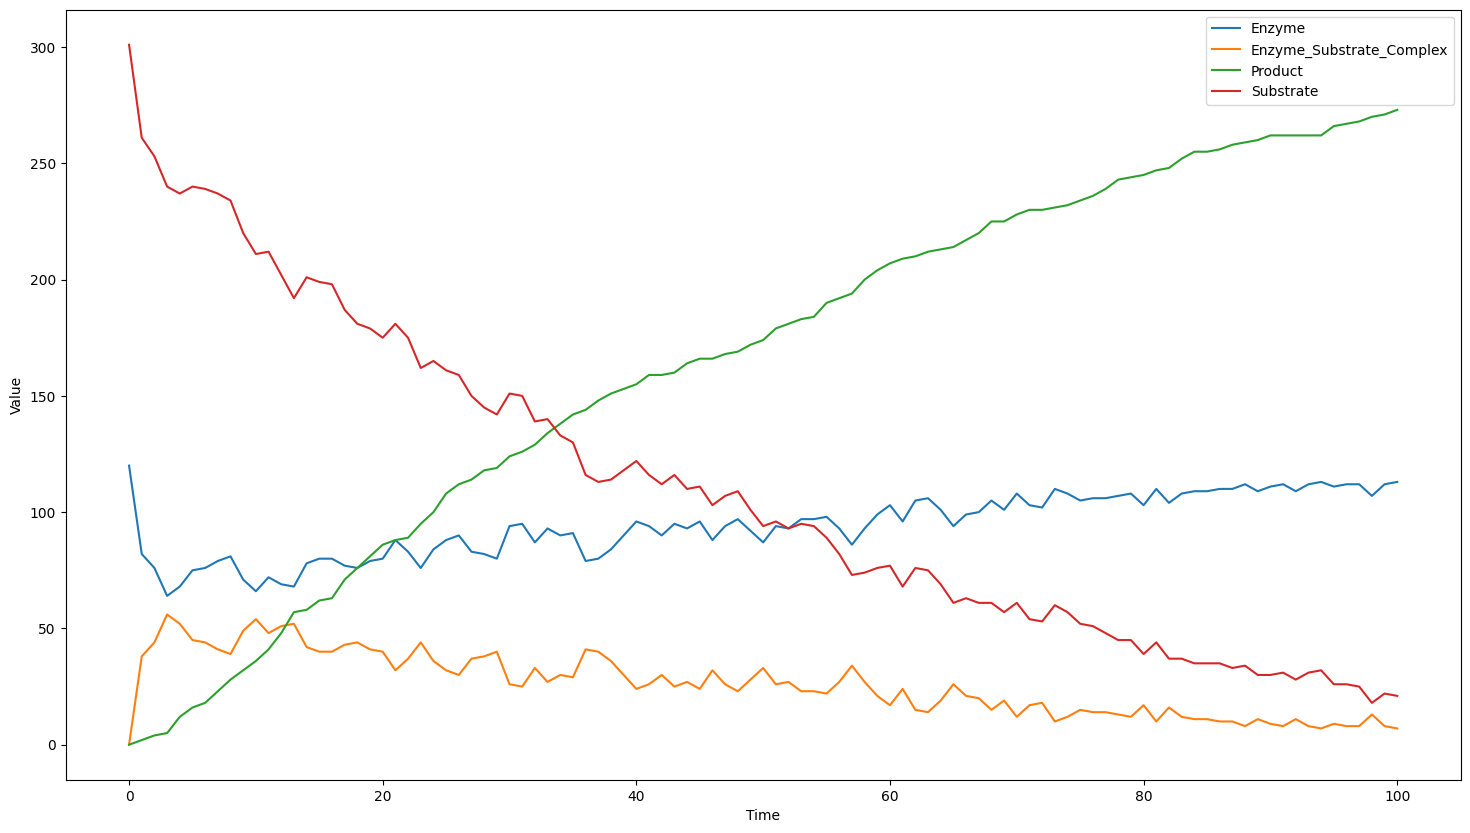

In [10]:
ssa_results.plot()

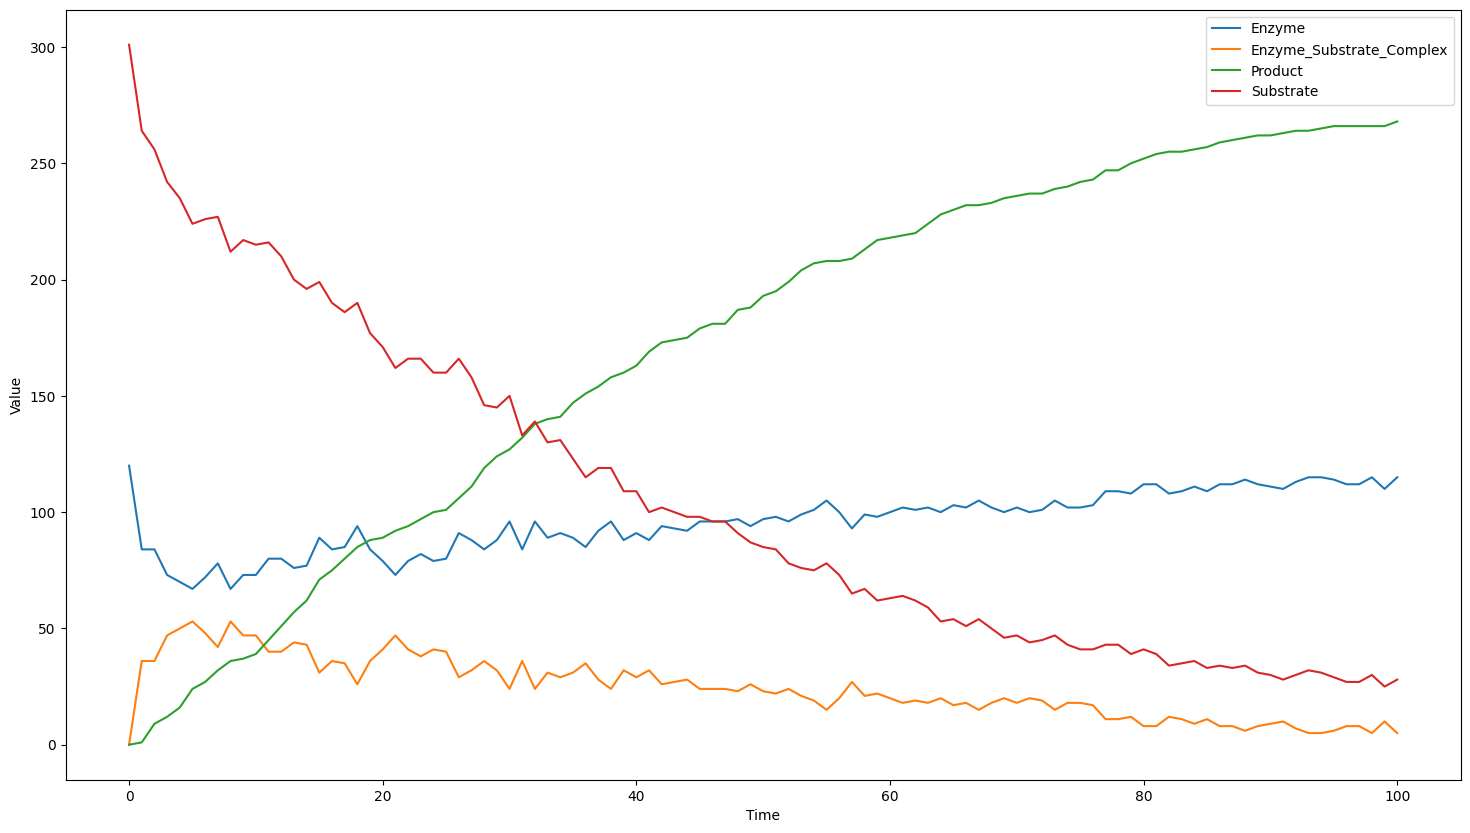

In [11]:
tau_results.plot()

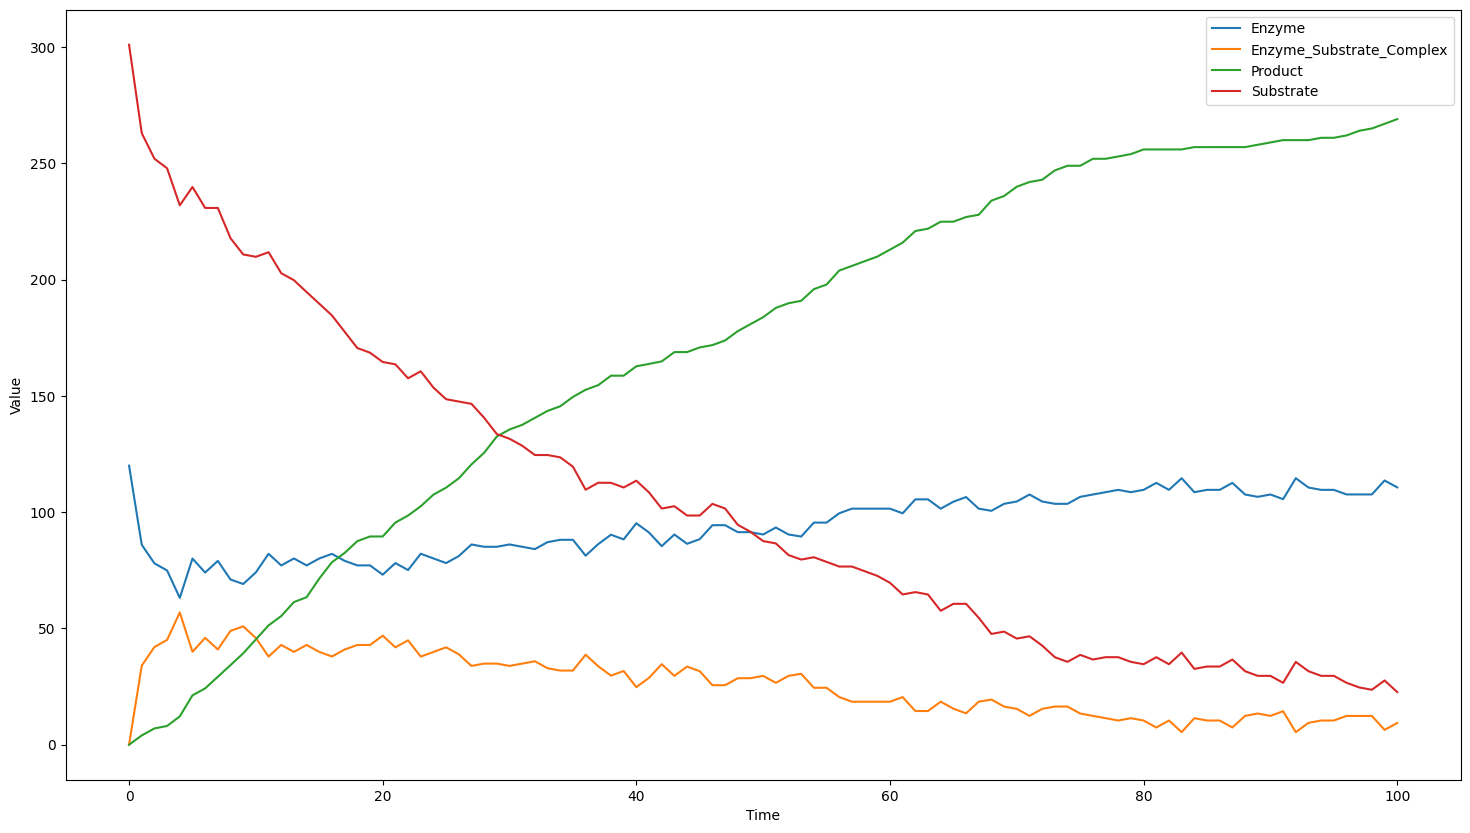

In [12]:
hybrid_results.plot()